In [90]:
import pandas as pd

In [91]:
df = pd.read_csv("./additional/BostonHousingDataset.csv")

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [93]:
# Заполним пропуски в rm медианным значением
df['rm'] = df['rm'].fillna(df['rm'].median())

Берём все параметры для построения линейной регрессии (изначально брала только те, которые достаточно сильно коррелировали с target, но постепенно вводя доп. параметры в модель, поняла, что MSE уменьшается).

In [94]:
# Инициализируем коэффициенты и свободный член нулями
W = [0.0 for _ in range(13)] # коэффициенты при признаках
b = 0.0 # свободный член

In [95]:
# Функция, вычисляющая y-predict
def predict(x, W, b):
    return sum(W[i] * x[i] for i in range(13)) + b

In [96]:
# Функция для вычисления MSE
def calculate_MSE (y_pred_col, y_fact_col):
    y_pred = list(y_pred_col)
    y_fact = list(y_fact_col)

    error_sum = 0.0
    for pred, fact in zip(y_pred, y_fact):
        error_sum += (fact - pred) ** 2

    mse = error_sum / len(y_pred)
    return mse   

Моей первой попыткой было нормализовать методом стандартизации (с пом. mean, std) и только параметры. Потом я нормализовала и целевую пременную - MSE резко упала с 27 до десятых долей единицы. Потом я попробовала min-max. MSE уменьшилась до сотых долей.

In [97]:
# Нормализация признаков
# (метод масштабирования)
features = ['lstat', 'rm', 'ptratio', 'indus', 'tax', 'nox', 'crim', 'rad', 'age', 'zn', 'b', 'dis', 'chas']

for col in features:
    max_x = max(df[col])
    min_x = min(df[col])
    df[col] = (df[col] - min_x) / (max_x - min_x)

# Нормализация целевой перем.
df['medv'] = (df['medv'] - min(df['medv'])) / (max(df['medv']) - min(df['medv']))

X = df[features].values.tolist()
Y = df['medv'].values.tolist()

In [98]:
# Градиентный спуск

learning_rate = 0.1 
epochs = 3500
n = len(X)

for epoch in range(epochs):
    # Инициализация производных
    dW = [0.0 for _ in range(13)]
    db = 0.0

    for xi, yi in zip(X, Y):
        y_pred = predict(xi, W, b)
        error = y_pred - yi

        # Производные MSE по каждому параметру W[i]
        for i in range(13):
            dW[i] += (2 / n) * error * xi[i]

        # Производная MSE по свободному члену b
        db += (2 / n) * error

    # Обновление параметров модели
    for i in range(13):
        W[i] -= learning_rate * dW[i]
    b -= learning_rate * db

    # Каждые 100 циклов выводим MSE
    if epoch % 100 == 0:
        y_preds = [predict(xi, W, b) for xi in X]
        mse = calculate_MSE(y_preds, Y)
        print(f"Epoch {epoch}: MSE = {mse:.4f}")
    

Epoch 0: MSE = 0.0611
Epoch 100: MSE = 0.0161
Epoch 200: MSE = 0.0130
Epoch 300: MSE = 0.0121
Epoch 400: MSE = 0.0116
Epoch 500: MSE = 0.0114
Epoch 600: MSE = 0.0113
Epoch 700: MSE = 0.0112
Epoch 800: MSE = 0.0111
Epoch 900: MSE = 0.0111
Epoch 1000: MSE = 0.0110
Epoch 1100: MSE = 0.0110
Epoch 1200: MSE = 0.0110
Epoch 1300: MSE = 0.0110
Epoch 1400: MSE = 0.0109
Epoch 1500: MSE = 0.0109
Epoch 1600: MSE = 0.0109
Epoch 1700: MSE = 0.0109
Epoch 1800: MSE = 0.0109
Epoch 1900: MSE = 0.0109
Epoch 2000: MSE = 0.0109
Epoch 2100: MSE = 0.0109
Epoch 2200: MSE = 0.0109
Epoch 2300: MSE = 0.0109
Epoch 2400: MSE = 0.0109
Epoch 2500: MSE = 0.0109
Epoch 2600: MSE = 0.0108
Epoch 2700: MSE = 0.0108
Epoch 2800: MSE = 0.0108
Epoch 2900: MSE = 0.0108
Epoch 3000: MSE = 0.0108
Epoch 3100: MSE = 0.0108
Epoch 3200: MSE = 0.0108
Epoch 3300: MSE = 0.0108
Epoch 3400: MSE = 0.0108


In [99]:
# Итоговые коэффициенты и ошибка
final_preds = [predict(xi, W, b) for xi in X]
final_mse = calculate_MSE(final_preds, Y)

print(f"Коэффициенты W: {[round(w, 4) for w in W]}")
print(f"Свободный член b: {round(b, 4)}")
f"Финальная MSE: {round(final_mse, 4)}"

Коэффициенты W: [-0.418, 0.4539, -0.1967, 0.0149, -0.1426, -0.1855, -0.202, 0.1532, 0.0024, 0.1004, 0.0854, -0.3461, 0.0599]
Свободный член b: 0.4617


'Финальная MSE: 0.0108'

In [100]:
# Готовое решение от scikit-learn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [101]:
import numpy as np

X_np = np.array(X)
Y_np = np.array(Y)

In [102]:
# Обучение модели
model = LinearRegression()
model.fit(X_np, Y_np)

LinearRegression()

In [103]:
sklearn_preds = model.predict(X_np)
sklearn_mse = mean_squared_error(Y_np, sklearn_preds)

print("\nСравнение с sklearn.LinearRegression")
print(f"Коэффициенты W: {[round(w, 4) for w in model.coef_]}")
print(f"Свободный член b: {round(model.intercept_, 4)}")
f"MSE: {round(sklearn_mse, 4)}"


Сравнение с sklearn.LinearRegression
Коэффициенты W: [np.float64(-0.4231), np.float64(0.4404), np.float64(-0.1991), np.float64(0.0133), np.float64(-0.1447), np.float64(-0.1914), np.float64(-0.2137), np.float64(0.1573), np.float64(0.0023), np.float64(0.1031), np.float64(0.0822), np.float64(-0.3576), np.float64(0.0597)]
Свободный член b: 0.4799


'MSE: 0.0108'

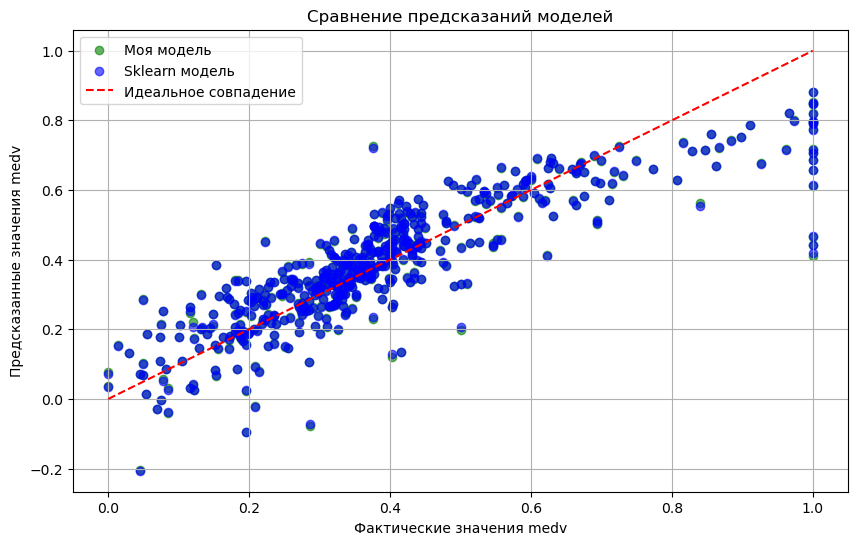

In [104]:
# График, отражающий точность предсказаний
import matplotlib.pyplot as plt

# Реальные значения
y_true = df['medv'].values

# Предсказания твоей модели
y_pred_custom = final_preds

# Предсказания sklearn
y_pred_sklearn = sklearn_preds

# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(y_true, y_pred_custom, alpha=0.6, label='Моя модель', color='green')
plt.scatter(y_true, y_pred_sklearn, alpha=0.6, label='Sklearn модель', color='blue')
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', label='Идеальное совпадение')

plt.xlabel("Фактические значения medv")
plt.ylabel("Предсказанные значения medv")
plt.title("Сравнение предсказаний моделей")
plt.legend()
plt.grid(True)
plt.show()

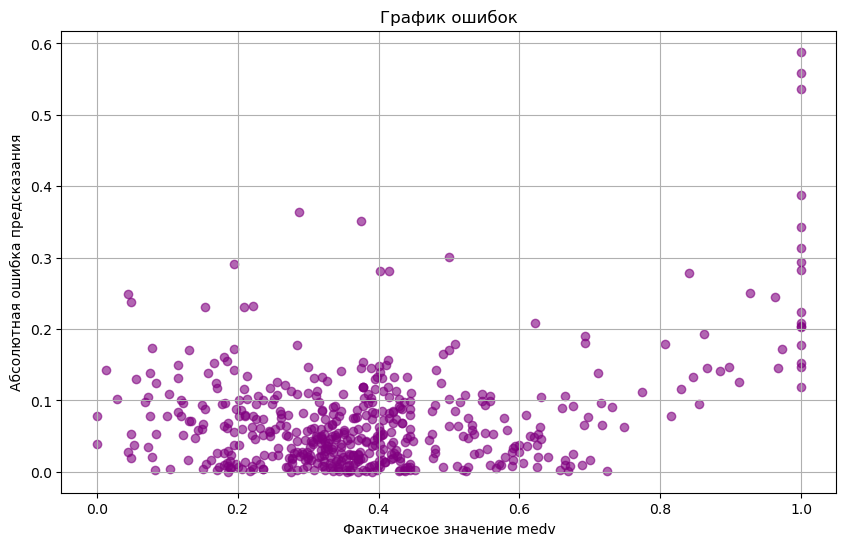

In [105]:
# Ошибка для каждого примера
errors = [abs(y_true - y_pred) for y_true, y_pred in zip(Y, y_pred_custom)]

# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(Y, errors, alpha=0.6, color='purple')
plt.xlabel("Фактическое значение medv")
plt.ylabel("Абсолютная ошибка предсказания")
plt.title("График ошибок")
plt.grid(True)
plt.show()

Как видим, модель плохо справляется с предсказаниями цены домов = 50 (в описании датасета есть упоминание о том, что 50 - некий искусственный потолок, не отражающий реальную картину на рынке недвижимости). И в целом, модель существеннее ошибается с ценами дешёвых и очень дорогих домов, что логично, так как данные значения medv являются выбросами (хорошо видно на боксплоте). Поэтому такие строки в датасете не совсем подпадают под общую закономерность, отсюда и промахи.